In [1]:
%matplotlib inline
import geopandas as gpd

In [2]:
fp = '/home/prakhar/Desktop/gis/Data/DAMSELFISH_distributions.shp'
data = gpd.read_file(fp)

In [3]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [4]:
data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,POLYGON ((-115.6437454219999 29.71392059300007...
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.589950704 21.89339825500002, -1..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.159618439 19.01535626700007, -1..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-80.86500229899997 -0.77894492099994...
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-67.33922225599997 -55.6761029239999...


In [5]:
data.describe()

,ID_NO,ORIGIN,YEAR,SEASONAL,RL_UPDATE
count,231.000000,231.0,231.000000,231.0,231.000000
mean,171994.398268,1.0,2010.857143,1.0,2012.142857
std,13693.222974,0.0,0.991893,0.0,0.049595
min,154760.000000,1.0,2010.000000,1.0,2012.100000
25%,154812.000000,1.0,2010.000000,1.0,2012.100000
50%,183397.000000,1.0,2010.000000,1.0,2012.100000
75%,183653.000000,1.0,2012.000000,1.0,2012.200000
max,184017.000000,1.0,2012.000000,1.0,2012.200000


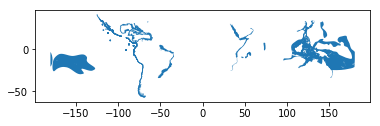

In [6]:
data.plot()

In [7]:
out = r"/home/prakhar/Desktop/gis/Data/DAMSELFISH_distributions_SELECTION.shp"

selection = data[0:50]

selection.to_file(out)

/home/prakhar/Desktop/gis/venv/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [8]:
data['geometry'].head()

0    POLYGON ((-115.6437454219999 29.71392059300007...
1    POLYGON ((-105.589950704 21.89339825500002, -1...
2    POLYGON ((-111.159618439 19.01535626700007, -1...
3    POLYGON ((-80.86500229899997 -0.77894492099994...
4    POLYGON ((-67.33922225599997 -55.6761029239999...
Name: geometry, dtype: object

In [9]:
selection = data[0:5]

In [10]:
for index, row in selection.iterrows():
    poly_area = row['geometry'].area
    print(f"Polygon area at index {index} is: {poly_area}")

Polygon area at index 0 is: 19.39625403004423
Polygon area at index 1 is: 6.145902112999523
Polygon area at index 2 is: 2.6972072716440176
Polygon area at index 3 is: 87.46062072709621
Polygon area at index 4 is: 0.0009183696153124292


In [11]:
data['area'] = data.area

In [12]:
data['area'].head(2)

0    19.396254
1     6.145902
Name: area, dtype: float64

In [13]:
max_area = data['area'].max()
mean_area = data['area'].mean()
print(f"Max area: {round(max_area,2)} \nMean area: {round(mean_area, 2)}")

Max area: 1493.2 
Mean area: 19.96


In [14]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona

newdata = gpd.GeoDataFrame()
newdata

""


In [15]:
coordinates = [(24.950, 60.169), (24.953, 60.169), (24.953, 60.170), (24.950, 60.169)]

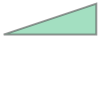

In [16]:
poly = Polygon(coordinates)
poly

In [17]:
newdata.loc[0, 'geometry'] = poly
newdata

,geometry
0,"POLYGON ((24.95 60.169, 24.953 60.169, 24.953 ..."


In [18]:
newdata.loc[0, 'Location'] = 'Sennatintori'

In [19]:
newdata

,geometry,Location
0,"POLYGON ((24.95 60.169, 24.953 60.169, 24.953 ...",Sennatintori


In [20]:
print(newdata.crs)

None


In [21]:
from fiona.crs import from_epsg

In [22]:
newdata.crs = from_epsg(4326)

In [23]:
newdata.crs

{'init': 'epsg:4326', 'no_defs': True}

In [24]:
outfp = r"/home/geo/Data/Sennatintori.shp"
newdata.to_file(out)

In [25]:
grouped = data.groupby('BINOMIAL')

In [26]:
grouped

In [27]:
for key, values in grouped:
    individual_fish = values

In [28]:
individual_fish

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry,area
27,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((121.6300326400001 33.04248618400004,...",38.671198
28,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((32.56219482400007 29.97488975500005,...",37.445735
29,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((130.9052090560001 34.02498196400006,...",16.939460
30,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,POLYGON ((56.32233070000007 -3.707270205999976...,10.126967
31,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,POLYGON ((40.64476131800006 -10.85502363999996...,7.760303
32,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,POLYGON ((48.11258402900006 -9.335103113999935...,3.434236
33,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((51.75403543100003 -9.21679305899994,...",2.408620


In [30]:
import os
outFolder = r"/home/prakhar/Desktop/gis"

resultFolder = os.path.join(outFolder, 'Results')
if not os.path.exists(resultFolder):
    os.makedirs(resultFolder)
    
for key, values in grouped:
    outName = "%s.shp" % key.replace(" ", "_")
    
    print(f"Processing: {key}")
    
    outpath = os.path.join(resultFolder, outName)
    
    values.to_file(outpath)

Processing: Abudefduf concolor
Processing: Abudefduf declivifrons
Processing: Abudefduf troschelii
Processing: Amphiprion sandaracinos
Processing: Azurina eupalama
Processing: Azurina hirundo
Processing: Chromis alpha
Processing: Chromis alta
Processing: Chromis atrilobata
Processing: Chromis crusma
Processing: Chromis cyanea
Processing: Chromis flavicauda
Processing: Chromis intercrusma
Processing: Chromis limbaughi
Processing: Chromis pembae
Processing: Chromis punctipinnis
Processing: Chrysiptera flavipinnis
Processing: Hypsypops rubicundus
Processing: Microspathodon bairdii
Processing: Microspathodon dorsalis
Processing: Nexilosus latifrons
Processing: Stegastes acapulcoensis
Processing: Stegastes arcifrons
Processing: Stegastes baldwini
Processing: Stegastes beebei
Processing: Stegastes flavilatus
Processing: Stegastes leucorus
Processing: Stegastes rectifraenum
Processing: Stegastes redemptus
Processing: Teixeirichthys jordani


# Map Projection

In [ ]:
fp = '/home/prakhar/Desktop/gis/Europe_borders.shp'